## Doris Fang 
#### Email: dola3725@gmail.com

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice
from IPython.display import display
from scipy import stats

import os

In [2]:
# Read the Excel file
data = pd.read_excel('./data/social_data.xlsx')

# Data Explore:

* ***Checking the basic information of dataset:***

In [3]:
#Read ad check how's the data looks like:
print(data.columns)
display(data.head()) #default set is top5 rows

Index(['Published Date', 'Account', 'Account Type', 'Campaign Name',
       'Total Impressions', 'Total Engagements', 'Media Type'],
      dtype='object')


,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video


* **Learning the dtypes of columns' and how many non-null values are there in those columns:**

In [4]:
print('The length of data is {},'.format(data.shape[0]),'the number of columns is {}.'.format(data.shape[1]))

The length of data is 3479, the number of columns is 7.


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Published Date     3479 non-null   datetime64[ns]
 1   Account            3479 non-null   object        
 2   Account Type       3479 non-null   object        
 3   Campaign Name      3479 non-null   object        
 4   Total Impressions  3479 non-null   int64         
 5   Total Engagements  3479 non-null   int64         
 6   Media Type         3479 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 190.4+ KB
None


* ***Checking the values of each clumns, and counting how many unique values in each column:***

In [6]:
unique_col = ['Account', 'Account Type', 'Campaign Name','Media Type']
for column in data[unique_col]:
    unique_values = data[column].unique()
    counts = len(unique_values)
    print("\nUnique values in column '{}': {}, \ntotal values: {}\n".format(column, unique_values, counts))


Unique values in column 'Account': ['CSGO' 'General ' 'DOTA2' 'Content Creators' 'Valorant' 'General'], 
total values: 6


Unique values in column 'Account Type': ['TWITTER' 'FBPAGE' 'INSTAGRAM' 'TIKTOK_BUSINESS' 'YOUTUBE'
 'LINKEDIN_COMPANY'], 
total values: 6


Unique values in column 'Campaign Name': ['N/A ' 'Community Engagement ' 'Evergreen ' 'Evil Exhibited '], 
total values: 4


Unique values in column 'Media Type': ['Text' 'Video' 'Photo' 'Link' 'Carousel' 'Mixed' 'Album'], 
total values: 7



**Based on the results above, in the "Account" column, there are two values that share the same name but with different spacing. One column has a space after the words, while the other one does not. In order to facilitate better analysis, I will merge these columns into a single value. Specifically, I will convert the column with a space to a non-space format.**

In [7]:
data['Account'] = data['Account'].replace('General ', 'General')
#print(data['Account'].unique()) 

#checked&Updated successed
#new count for the unique values:
for column in data[unique_col]:
    unique_values = data[column].unique()
    counts = len(unique_values)
    print("\nUnique values in column '{}': {}, \ntotal values: {}\n".format(column, unique_values, counts))


Unique values in column 'Account': ['CSGO' 'General' 'DOTA2' 'Content Creators' 'Valorant'], 
total values: 5


Unique values in column 'Account Type': ['TWITTER' 'FBPAGE' 'INSTAGRAM' 'TIKTOK_BUSINESS' 'YOUTUBE'
 'LINKEDIN_COMPANY'], 
total values: 6


Unique values in column 'Campaign Name': ['N/A ' 'Community Engagement ' 'Evergreen ' 'Evil Exhibited '], 
total values: 4


Unique values in column 'Media Type': ['Text' 'Video' 'Photo' 'Link' 'Carousel' 'Mixed' 'Album'], 
total values: 7



# Task:

**1.1 What is the typical engagement rate we can expect?**

In [8]:
total_engagements = data['Total Engagements']
total_impressions = data['Total Impressions']

# Calculate the engagement rate
data['Engagement Rate %'] = (total_engagements / total_impressions) * 100
data['Engagement Rate %'].fillna(0, inplace = True)
#print(data['Engagement Rate'].describe())
display(data.head())

,Published Date,Account,Account Type,Campaign Name,Total Impressions,Total Engagements,Media Type,Engagement Rate %
0,2023-03-31 19:55:43.192,CSGO,TWITTER,N/A,0,0,Text,0.000000
1,2023-03-31 19:49:35.243,CSGO,TWITTER,N/A,0,0,Text,0.000000
2,2023-03-31 19:49:33.535,CSGO,TWITTER,N/A,0,0,Text,0.000000
3,2023-03-31 19:49:31.583,CSGO,TWITTER,N/A,0,0,Text,0.000000
4,2023-03-31 19:43:42.590,CSGO,TWITTER,Community Engagement,9517,1215,Video,12.766628


**Checking Engagement Rate:**

In [9]:
skewed_data = data[data['Engagement Rate %'] > 100]
print(skewed_data)

          Published Date  Account Account Type Campaign Name  \
837  2023-03-10 12:37:06  General       FBPAGE          N/A    
3216 2023-01-19 06:02:34  General       FBPAGE          N/A    
3457 2023-01-05 11:55:44  General       FBPAGE          N/A    

      Total Impressions  Total Engagements Media Type  Engagement Rate %  
837                   1                940      Photo       94000.000000  
3216                  5                 44      Photo         880.000000  
3457                300               3776      Photo        1258.666667  


****
**I assumed that rows 837, 3216, and 3457 contain skewed data in this dataset. There are several reasons for this assumption:**
1. The total impressions should generally be lower than the total engagements because total impressions represent the number of times a post or content is displayed to users, while engagements represent the number of interactions or actions taken by users, such as likes, comments, shares, or clicks. Therefore, it is unusual for the total impressions to exceed the total engagements.

2. The engagement rate is calculated by dividing the total engagements by the total impressions and multiplying by 100. An engagement rate higher than 100% indicates that there might be an error or discrepancy in the data.
****
**Considering these reasons, I have decided to drop these rows from my dataset in the following analysis to ensure the accuracy and reliability of the results.**

In [10]:
skewed_dt = [837, 3216, 3457]
withoutSkewed_dt = data.drop(skewed_dt)
new_dt = withoutSkewed_dt

In [11]:
EngagementRate0 = (data['Total Engagements'].sum()/data['Total Impressions'].sum()) * 100
print("Before I dropped the skewed data, the aggregate engagement Rate is: {:.2f}%".format(EngagementRate0))
EngagementRate1 = (withoutSkewed_dt['Total Engagements'].sum()/withoutSkewed_dt['Total Impressions'].sum()) * 100
print("After I dropped the skewed data, the aggregate engagement Rate is: {:.2f}%".format(EngagementRate1))

Before I dropped the skewed data, the aggregate engagement Rate is: 8.63%
After I dropped the skewed data, the aggregate engagement Rate is: 8.62%


**1.2 What’s the likelihood that we can achieve a 15% engagement rate?**

In [12]:
filtered_dt = new_dt[new_dt['Engagement Rate %'] > 15]
filtered_dt.reset_index(drop = True, inplace = True)
#filtered_dt.head()

In [13]:
# Calculate the total number of rows
total_rows = len(new_dt)

# Calculate the number of rows with an engagement rate higher than 15
filtered_rows = len(filtered_dt)

# Calculate the likelihood
likelihood = (filtered_rows / total_rows) * 100

# Print the likelihood
print("The likelihood of achieving a 15% engagement rate is: {:.2f}%".format(likelihood))

The likelihood of achieving a 15% engagement rate is: 6.42%


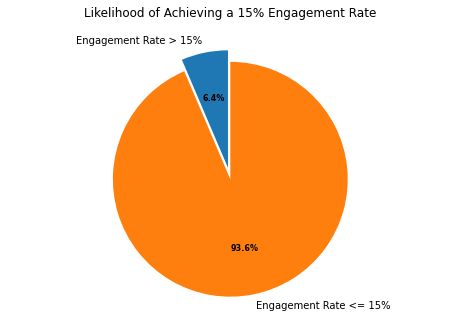

In [14]:
# Calculate the complementary ratio
complementary_ratio = 100 - likelihood

# Create data for the pie chart
ratios = [likelihood, complementary_ratio]
labels = ['Engagement Rate > 15%', 'Engagement Rate <= 15%']
explode = (0.1, 0)

# Create a pie chart
fig, ax = plt.subplots(figsize = (8, 5), subplot_kw = dict(aspect="equal"))
wedges, texts, autotexts = ax.pie(ratios, explode = explode, labels = labels,
                                  autopct = '%1.1f%%', shadow = False, startangle = 90)

#Customizing the text inside the pie chart
plt.setp(autotexts, size = 8, weight = "bold")

#Adding a title to the chart
ax.set_title("Likelihood of Achieving a 15% Engagement Rate\n")
# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.show()

**2. Does day of the week and time of posting affect engagement rates?**

* **Since the dtype of the 'Published date' column is datetime64, there is no need to convert this column to datetime format. If needed, we can use 'pd.to_datetime()'. I utilized 'day_name()' to create a new column named 'Day of Week', and followed a similar approach for the 'hour of day' column.**

In [15]:
new_dt['Published Date'] = pd.to_datetime(data['Published Date'])
new_dt['Day of Week'] = new_dt['Published Date'].dt.day_name()
new_dt['Hour of Day'] = new_dt['Published Date'].dt.hour

* **This is how the new dataset looks like:**

In [16]:
print(new_dt.head())

           Published Date Account Account Type          Campaign Name  \
0 2023-03-31 19:55:43.192    CSGO      TWITTER                   N/A    
1 2023-03-31 19:49:35.243    CSGO      TWITTER                   N/A    
2 2023-03-31 19:49:33.535    CSGO      TWITTER                   N/A    
3 2023-03-31 19:49:31.583    CSGO      TWITTER                   N/A    
4 2023-03-31 19:43:42.590    CSGO      TWITTER  Community Engagement    

   Total Impressions  Total Engagements Media Type  Engagement Rate %  \
0                  0                  0       Text           0.000000   
1                  0                  0       Text           0.000000   
2                  0                  0       Text           0.000000   
3                  0                  0       Text           0.000000   
4               9517               1215      Video          12.766628   

  Day of Week  Hour of Day  
0      Friday           19  
1      Friday           19  
2      Friday           19  
3     

***
* **The scatter box plot and table below showcases the posting frequencies for each weekday, revealing that**
1. Tuesday and Thursday have the highest median engagement rates, indicating that these two days tend to have higher engagement rates compared to other weekdays.
2. Saturday has the lowest median engagement rate. 
3. There is an outlier on Thursday, which indicates that there might be some unusual or extreme values for the engagement rate on that day.
4. The top 3 weekdays with the highest total impressions are Thursday, Friday and Tuesday; Monday has the lowest total impressions among all the weekdays.
5. The top 3 weekdays with the highest total engagaments is Thursday, Tuesday and Friday; Saturday has the lowest total engagaments among all the weekdays.
****
**On average, the aggregate engagement rate for each day of the week amounts to 8.24%.**

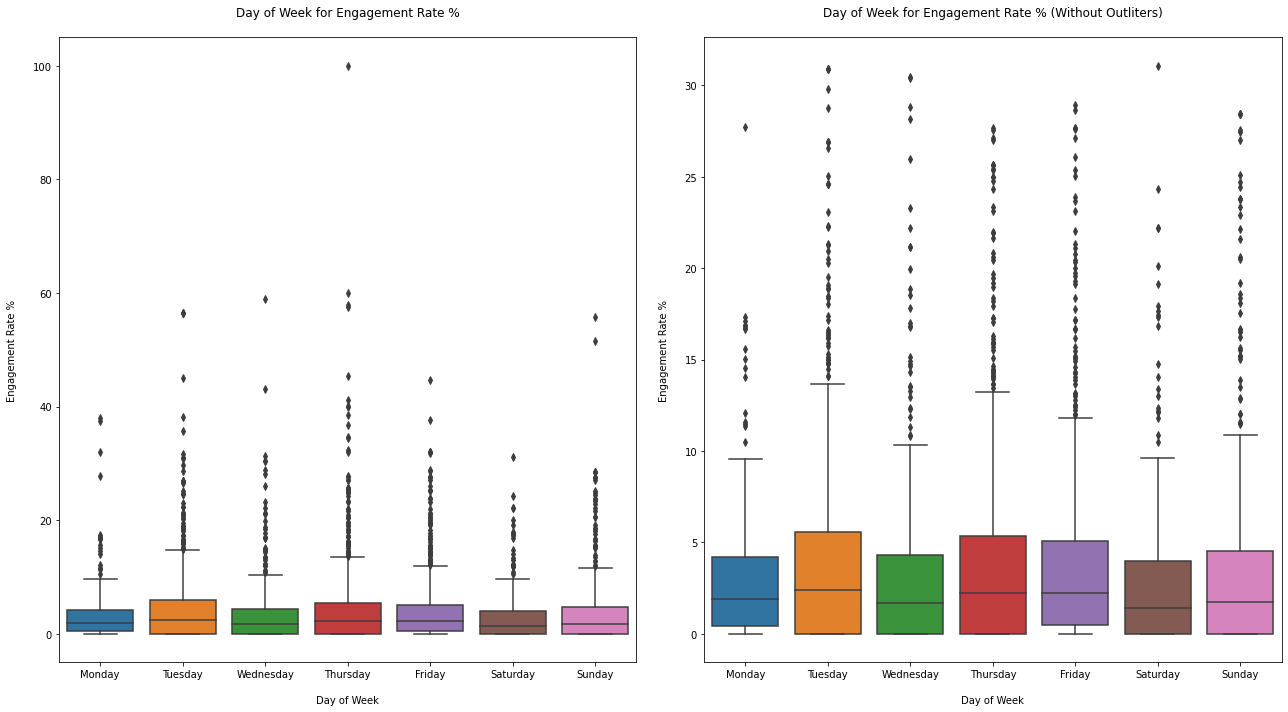

In [17]:
# Set the order of the days of the week for proper sorting on the line plot
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
new_dt['Day of Week'] = pd.Categorical(new_dt['Day of Week'], categories = weekdays, ordered = True)
df = new_dt.sort_values(['Day of Week', 'Hour of Day'])

fig, ax = plt.subplots(1, 2, figsize=(18, 10))

sns.boxplot(data = df, x = 'Day of Week', y = 'Engagement Rate %', ax=ax[0])
ax[0].set_title('Day of Week for Engagement Rate %\n')
ax[0].set_xlabel('\nDay of Week')
ax[0].set_ylabel('Engagement Rate %\n')

# Filter outliers
outliers = df[df['Engagement Rate %'] > df['Engagement Rate %'].quantile(0.99)]
filtered_data = df[~df.index.isin(outliers.index)]


sns.boxplot(data = filtered_data, 
            x = 'Day of Week', y = 'Engagement Rate %', ax = ax[1])
ax[1].set_title('Day of Week for Engagement Rate % (Without Outliters)\n')
ax[1].set_xlabel('\nDay of Week')
ax[1].set_ylabel('\nEngagement Rate %\n')

plt.tight_layout() #adjust spacing between subplots

plt.show()

In [18]:
metrics = {
    'Counts': new_dt['Day of Week'].value_counts().sort_index(),
    'Total Impressions': new_dt.groupby('Day of Week')['Total Impressions'].sum(),
    'Total Engagements': new_dt.groupby('Day of Week')['Total Engagements'].sum()
}

# Create a summary DataFrame
summary = pd.DataFrame(metrics)

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_summary = summary.reindex(weekdays)

print(sorted_summary.to_string())
engagement_by_day = new_dt.groupby('Day of Week')['Total Engagements'].sum()
impression_by_day = new_dt.groupby('Day of Week')['Total Impressions'].sum()
print('\nThe the aggregate engagement Rate for each day of week is {:.2f}%.'.format((engagement_by_day/impression_by_day).mean() * 100))

           Counts  Total Impressions  Total Engagements
Monday        234            2476029             166279
Tuesday       561            7197026             731487
Wednesday     575            5736454             448516
Thursday      704            8522399             761100
Friday        707            7481112             641656
Saturday      319            3028493             146694
Sunday        376            3731347             395480

The the aggregate engagement Rate for each day of week is 8.24%.


****
* **The scatter box plot and table below showcases the posting frequencies for each time period of day, revealing that:**
1. Time at 3AM have the highest median engagement rates, then time periods between 7AM to 8AM, then 5AM, indicating that these time periods tend to have higher engagement rates compared to other times of day.
2. Time at 22PM tp 23PM has the lowest median engagement rate. 
3. There is an outlier on 6AM, which indicates that there might be some unusual or extreme values for the engagement rate on that day.
4. It is important to note that different time periods have varying counts of postings. For instance, the time period between 1AM to 6AM has the lowest number of postings. However, it does not necessarily result in the lowest engagement rate.
5. The top 3 time periods with the highest total impressions start from 9AM to 11AM, 14PM, and 16PM
6. The top 3 time periods with the highest total engagaments is 9AM, 14PM, and 16PM
****
**On average, the aggregate engagement rate for each day of the week amounts to 8.45%.**

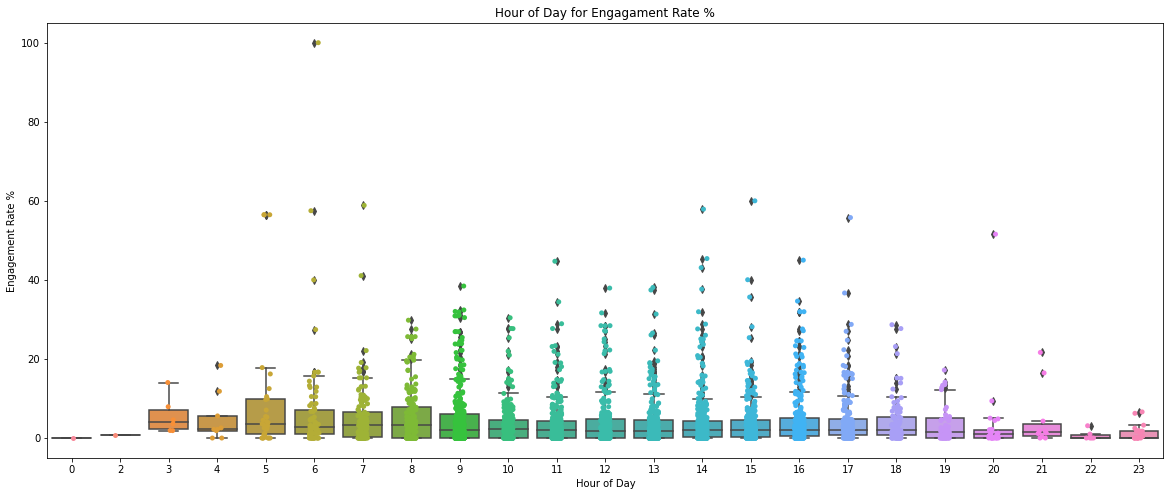

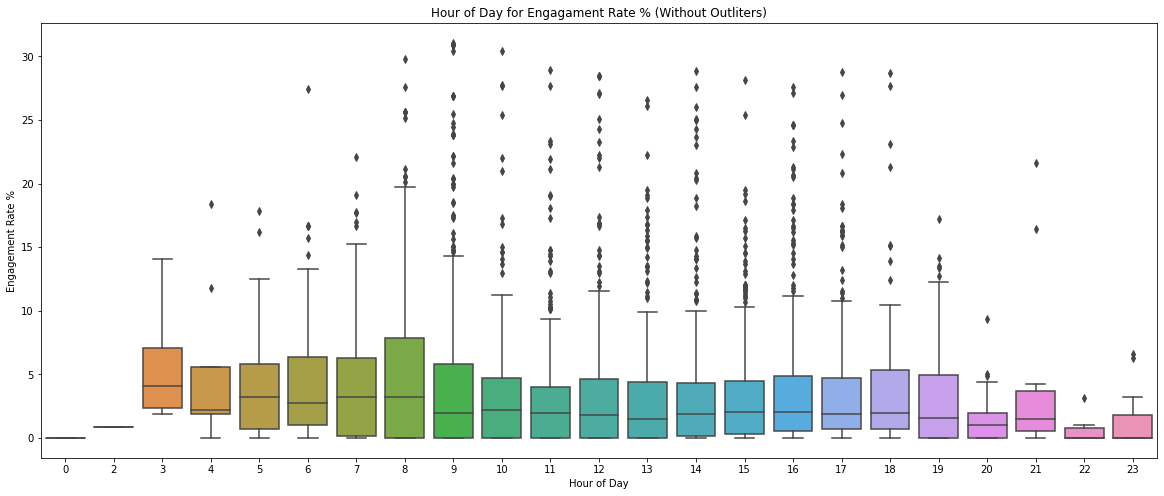

In [19]:
plt.figure(figsize=(20, 8))
sns.stripplot(data = df, x = 'Hour of Day', y = 'Engagement Rate %', jitter = True)
sns.boxplot(data = df, x = 'Hour of Day', y = 'Engagement Rate %')
plt.title('Hour of Day for Engagament Rate %')
plt.xlabel('Hour of Day')
plt.ylabel('Engagement Rate %')

#plt.yscale('log')
plt.show()

# Box plot: Hour of Day vs. Engagement Rate (without outliers)
plt.figure(figsize=(20, 8))
sns.boxplot(data = filtered_data, x = 'Hour of Day', y = 'Engagement Rate %')
plt.title('Hour of Day for Engagament Rate % (Without Outliters)')
plt.xlabel('Hour of Day')
plt.ylabel('Engagement Rate %')
plt.show()

In [20]:
metrics = {
    'Counts': new_dt['Hour of Day'].value_counts().sort_index(),
    'Total Impressions': new_dt.groupby('Hour of Day')['Total Impressions'].sum(),
    'Total Engagements': new_dt.groupby('Hour of Day')['Total Engagements'].sum()
}

# Create a summary DataFrame
summary = pd.DataFrame(metrics)

times = range(0,24)
sorted_summary = summary.reindex(times)

print(sorted_summary.to_string())
engagement_by_hour = new_dt.groupby('Hour of Day')['Total Engagements'].sum()
impression_by_hour = new_dt.groupby('Hour of Day')['Total Impressions'].sum()

print('\nThe aggregate engagement Rate for hour of day is {:.2f}%.'.format((engagement_by_hour/impression_by_hour).mean() * 100))

    Counts  Total Impressions  Total Engagements
0      1.0                0.0                0.0
1      NaN                NaN                NaN
2      1.0            32613.0              274.0
3      6.0            66113.0             5114.0
4      9.0            46270.0             4135.0
5     31.0           342095.0            89914.0
6     77.0           724658.0            58477.0
7    128.0          1059382.0           151929.0
8    172.0          1901692.0           198343.0
9    384.0          5292903.0           467383.0
10   265.0          4218300.0           276096.0
11   371.0          4207938.0           290577.0
12   310.0          2840865.0           168307.0
13   332.0          2972010.0           244493.0
14   357.0          4387222.0           432316.0
15   326.0          2977915.0           206022.0
16   299.0          3385058.0           316223.0
17   188.0          2072271.0           234460.0
18   107.0          1044968.0           105899.0
19    50.0          

* **Building pivot table to find the highest engagement rates by day of the week and time of posting affect**

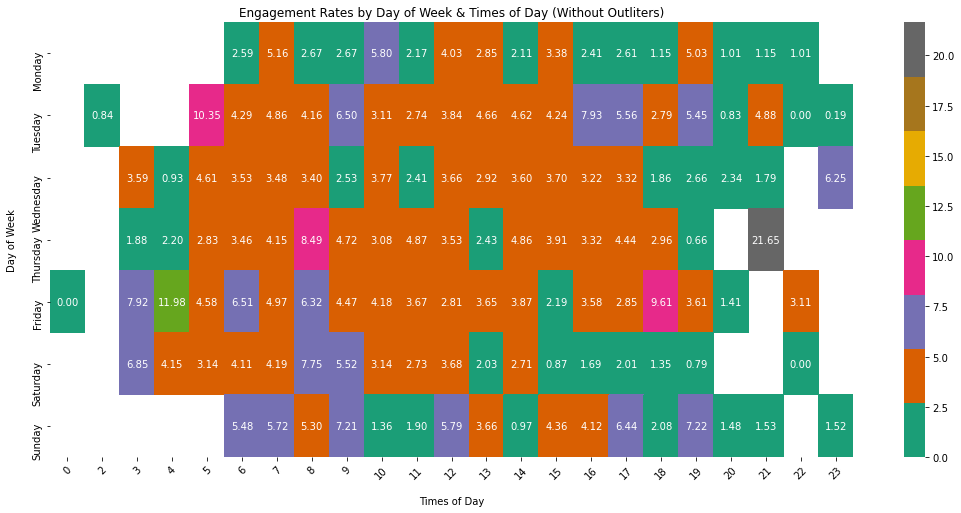

In [21]:
# Filter outliers
outliers = df[df['Engagement Rate %'] > df['Engagement Rate %'].quantile(0.99)]
filtered_data = df[~df.index.isin(outliers.index)]

# Create pivot table
pivot_df = filtered_data.pivot_table(index='Day of Week', columns='Hour of Day', values='Engagement Rate %')

# Plot the engagement rates using a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(pivot_df, cmap='Dark2', annot=True, fmt='.2f', cbar=True, label='Engagement Rate')
plt.title('Engagement Rates by Day of Week & Times of Day (Without Outliters)')
plt.xlabel('\nTimes of Day')
plt.ylabel('Day of Week\n')
plt.xticks(rotation=45)
plt.show()

In [22]:
# Prepare the data for ANOVA
engagementRates_Mon = filtered_data[filtered_data['Day of Week'] == 'Monday']['Engagement Rate %']
engagementRates_Tu = filtered_data[filtered_data['Day of Week'] == 'Tuesday']['Engagement Rate %']
engagementRates_Wed = filtered_data[filtered_data['Day of Week'] == 'Wednesday']['Engagement Rate %']
engagementRates_Thur = filtered_data[filtered_data['Day of Week'] == 'Thursday']['Engagement Rate %']
engagementRates_Fri = filtered_data[filtered_data['Day of Week'] == 'Friday']['Engagement Rate %']
engagementRates_Sat = filtered_data[filtered_data['Day of Week'] == 'Saturday']['Engagement Rate %']
engagementRates_Sun = filtered_data[filtered_data['Day of Week'] == 'Sunday']['Engagement Rate %']
# Repeat the above line for other days of the week

# Perform the ANOVA test
f_stats, p_value = stats.f_oneway(engagementRates_Mon, engagementRates_Tu,
                                      engagementRates_Wed, engagementRates_Thur,
                                     engagementRates_Fri, engagementRates_Sat,engagementRates_Sun)
print(f"F-statistic: {f_stats}")
print(f"P-value: {p_value}")

alpha = 0.05 
if p_value < alpha:
    print("There is a significant difference between engagement rates accross different days")
else:
    print("There is no significant difference between engagement rates accross different days")


F-statistic: 5.564112868266315
P-value: 9.416083202393845e-06
There is a significant difference between engagement rates accross different days


***
* **Based on what I discoveries, I would like to  concluded that the day of the week and time of posting have an impact on engagement rates. Here are my reasons:**
1. I performed a statistical test, specifically ANOVA, to analyze the data and compare the differences among the engagement rates for each weekdays. The purpose was to identify any significant patterns in the data. Based on the dataset, the results indicate a significant difference between the engagement rates across different weekdays.
2. The F-statistic of 5.564 and a very low p-value of 9.416e-06. The smaller p-value indicates stronger evidence against the null hypothesis.Therefore, we can infer that the engagement rates vary significantly across the different days of the week.
3. In the heatmap, the varying shades of color depict the engagement rates, with darker colors indicating higher rates. Thus, the heatmap without outliters shows the highest engagement rate exists on Thursday 23PM. Then, the second highest engagement exists on Friday 4AM; Thirds is Tuesday at 5AM, and Friday at 18PM.
****
**Since different days and times might have more or less activity, leading to variations in engagement rate levels. Thus, the question 2 answer is Yes.**

**3. How are our game titles doing in terms of social performance? Is there a specific game we should focus more on or less?**

In [23]:
engagement_account = df.groupby('Account')['Total Engagements'].sum()
impression_account = df.groupby('Account')['Total Impressions'].sum()

print('The aggregate engagement Rate for game titles is {:.2f}%.\n'.format((engagement_account/impression_account).mean() * 100))

The aggregate engagement Rate for game titles is 5.37%.



In [24]:
metrics = {
    'Total Impressions': new_dt.groupby('Account')['Total Impressions'].sum(),
    'Total Engagements': new_dt.groupby('Account')['Total Engagements'].sum()
}

# Create a summary DataFrame
summary = pd.DataFrame(metrics)

# Sort the summary DataFrame by a specific metric
sorted_summary = summary.sort_values(by = 'Total Impressions', ascending = False)

print(sorted_summary.to_string())

                  Total Impressions  Total Engagements
Account                                               
General                    33931451            3072568
CSGO                        2313918              92336
DOTA2                       1859326             123990
Content Creators              45186               1387
Valorant                      22979                931


In [25]:
# Prepare the data for ANOVA
engagementRates_csgo = filtered_data[filtered_data['Account'] == 'CSGO']['Engagement Rate %']
engagementRates_general = filtered_data[filtered_data['Account'] == 'General']['Engagement Rate %']
engagementRates_dota2 = filtered_data[filtered_data['Account'] == 'DOTA2']['Engagement Rate %']
engagementRates_valorant = filtered_data[filtered_data['Account'] == 'Valorant']['Engagement Rate %']
engagementRates_contentCreators = filtered_data[filtered_data['Account'] == 'Content Creators']['Engagement Rate %']
# Repeat the above line for other days of the week

# Perform the ANOVA test
f_stats, p_value = stats.f_oneway(engagementRates_csgo,
                                 engagementRates_general,
                                 engagementRates_dota2,
                                 engagementRates_valorant,
                                 engagementRates_contentCreators)
print(f"F-statistic: {f_stats}")
print(f"P-value: {p_value}")

alpha = 0.05 
if p_value < alpha:
    print("There is a significant difference between engagement rates accross game titles.")
else:
    print("There is no significant difference between engagement rates accross game titles.")


F-statistic: 3.672693982102983
P-value: 0.005451987816836251
There is a significant difference between engagement rates accross game titles.


***
* **Making a summary of the discoveries above:**
1. The aggregate engagement Rate for game titles is 5.37%.
2. In 'General', this game title has the highest total impressions which is 33,931,451, total engagements is 3,072,568. 
3. The second highest total impressions is 'CSGO', third is 'DOTA2'; Notably, the second highest total engagement is 'DOTA2', third is 'CSGO'.
4. I also performed a statistical test, specifically ANOVA, to analyze the data and compare the differences among the engagement rates for games.Based on the dataset, the results indicate a significant difference between the engagement rates across different games.
5. The F-statistic is 3.672 and a low P-value is 0.005, which P < 0.05. Therefore, we can infer that the engagement rates vary significantly across the different days of the week.
****
* **Use heatmap to check the engagement rate by Account, by Acount and the day of weeks, by Account and the hour of day:**

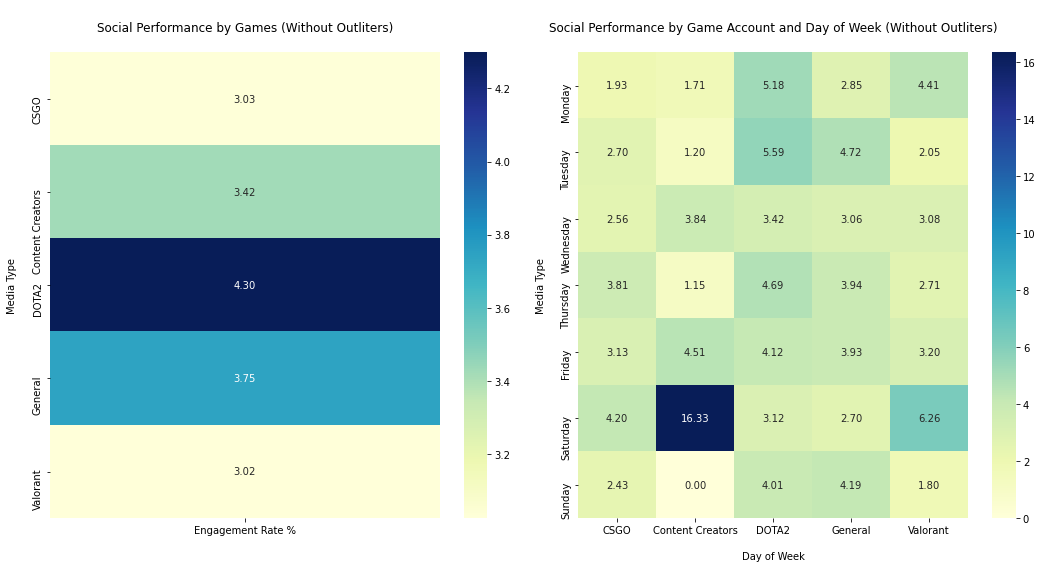

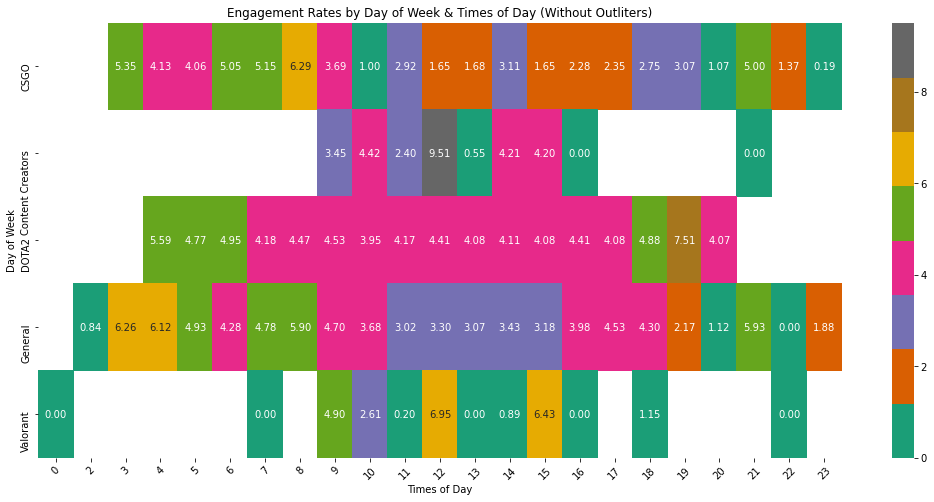

In [26]:
pt_game = filtered_data.pivot_table(index = 'Account', values = 'Engagement Rate %')
pt_WeekdayGame = filtered_data.pivot_table(index = 'Day of Week', columns = 'Account', values = 'Engagement Rate %')


fig, ax = plt.subplots(1, 2, figsize = (15, 8))
#plt.figure(figsize = (8, 6))
sns.heatmap(pt_game, cmap='YlGnBu', annot = True, fmt = '.2f', cbar = True, ax = ax[0])
ax[0].set_title('\nSocial Performance by Games (Without Outliters)\n')
ax[0].set_xlabel('\n')
ax[0].set_ylabel('Media Type\n')


sns.heatmap(pt_WeekdayGame, cmap='YlGnBu', annot = True, fmt = '.2f', cbar = True,  ax = ax[1])
ax[1].set_title('\nSocial Performance by Game Account and Day of Week (Without Outliters)\n')
ax[1].set_xlabel('\nDay of Week')
ax[1].set_ylabel('Media Type\n')
plt.tight_layout()
plt.show()

pivot_df = filtered_data.pivot_table(index = 'Account', columns='Hour of Day', values='Engagement Rate %')

# Plot the engagement rates using a heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(pivot_df, cmap='Dark2', annot=True, fmt='.2f', cbar=True, label='Engagement Rate')
plt.title('Engagement Rates by Day of Week & Times of Day (Without Outliters)')
plt.xlabel('Times of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.show()

pt_accType = filtered_data.pivot_table(index = 'Account Type', columns = 'Account', values='Engagement Rate %')

***
* **Based on the results I found, here is my analysis:**
1. In the top left plot, it cleared to show the highest engagament rate is in 'DOTA2', despite 'General' is the  the highest total impressions and total engagements. The second highest engagament rate is 'General', the third is 'Content Creators'
2. The engagement rate of different games varies on different weekdays. Based on the heatmap analysis I conducted, we can establish a social performance strategy for each game: 
    1. 'CSGO' focuses on Thursday and Saturday
    2. 'Content Creators' mainly focuses on Saturday, then Wednesday and Friday
    3. 'DOTA2' focuses on Monday, Tuesday and Thursday
    4. 'General' mainly focuses on Tuesday and Sunday
    5. 'Valorant' maily focuses on Monday and Saturday
3. The engagement rate of different games varies at different times of the day. Taking into consideration the posting strategy on weekdays which I mention above, now let's adding a specific time period for differnt game:
    1. 'CSGO' focuses on Thursday and Saturday; 
        Posting Time period maily at 8AM, then 3AM, 6AM-7AM, 21PM;
        
    2. 'Content Creators' mainly focuses on Saturday, then Wednesday and Friday; 
        Posting Time period maily at 12PM, then 10AM, 14PM-15PM
        
    3. 'DOTA2' focuses on Monday, Tuesday and Thursday;
        Posting Time period maily at 19PM, then 4AM-6AM, 18PM
        
    4. 'General' mainly focuses on Tuesday and Sunday;
        Posting Time period maily at 3AM-4AM, then 5AM,7AM-8AM, 21PM
        
    5. 'Valorant' maily focuses on Monday and Saturday;
        Posting Time period maily at 12PM, 15PM, then 9AM
****
**In conclustion, 'DOTA2' appears to be performing the best in terms of engagement rate. However, it is also important to consider the target audience and goals for each game title. CSGO, General, and Content Creators, Valorant also show potential for focused strategies to further improve social performance. Hence, I do not think we shold focus more or less one of the game title in this time. We can set differnt posting strategies as I suggested above to different game.**
****

**4. What media type performs the best?**

In [27]:
engagement_account = df.groupby('Media Type')['Total Engagements'].sum()
impression_account = df.groupby('Media Type')['Total Impressions'].sum()

print('The aggregate engagement Rate for Media Type is {:.2f}%.\n'.format((engagement_account/impression_account).mean() * 100))

The aggregate engagement Rate for Media Type is 11.07%.



In [28]:
metrics = {
    'Total Impressions': new_dt.groupby('Media Type')['Total Impressions'].sum(),
    'Total Engagements': new_dt.groupby('Media Type')['Total Engagements'].sum()
}

# Create a summary DataFrame
summary = pd.DataFrame(metrics)

# Sort the summary DataFrame by a specific metric
sorted_summary = summary.sort_values(by = 'Total Impressions', ascending = False)

print(sorted_summary.to_string())

            Total Impressions  Total Engagements
Media Type                                      
Photo                23893686            2162979
Video                10594813             859451
Text                  3106203             246312
Link                   232465               2257
Mixed                  184984              13664
Carousel               160689               6541
Album                      20                  8


In [29]:
# Prepare the data for ANOVA
engagementRates_photo = filtered_data[filtered_data['Media Type'] == 'Photo']['Engagement Rate %']
engagementRates_video = filtered_data[filtered_data['Media Type'] == 'Video']['Engagement Rate %']
engagementRates_text = filtered_data[filtered_data['Media Type'] == 'Text']['Engagement Rate %']
engagementRates_link = filtered_data[filtered_data['Media Type'] == 'Link']['Engagement Rate %']
engagementRates_mixed = filtered_data[filtered_data['Media Type'] == 'Mixed']['Engagement Rate %']
engagementRates_carousel = filtered_data[filtered_data['Media Type'] == 'Carousel']['Engagement Rate %']
engagementRates_album = filtered_data[filtered_data['Media Type'] == 'Album']['Engagement Rate %']
# Repeat the above line for other days of the week

# Perform the ANOVA test
f_stats, p_value = stats.f_oneway(engagementRates_photo,
                                 engagementRates_video,
                                 engagementRates_text,
                                 engagementRates_link,
                                 engagementRates_mixed,
                                 engagementRates_carousel,
                                 engagementRates_album)
print(f"F-statistic: {f_stats}")
print(f"P-value: {p_value}")

alpha = 0.05 
if p_value < alpha:
    print("There is a significant difference between engagement rates accross game titles.")
else:
    print("There is no significant difference between engagement rates accross game titles.")


F-statistic: 23.06742646220915
P-value: 7.832134140434073e-27
There is a significant difference between engagement rates accross game titles.


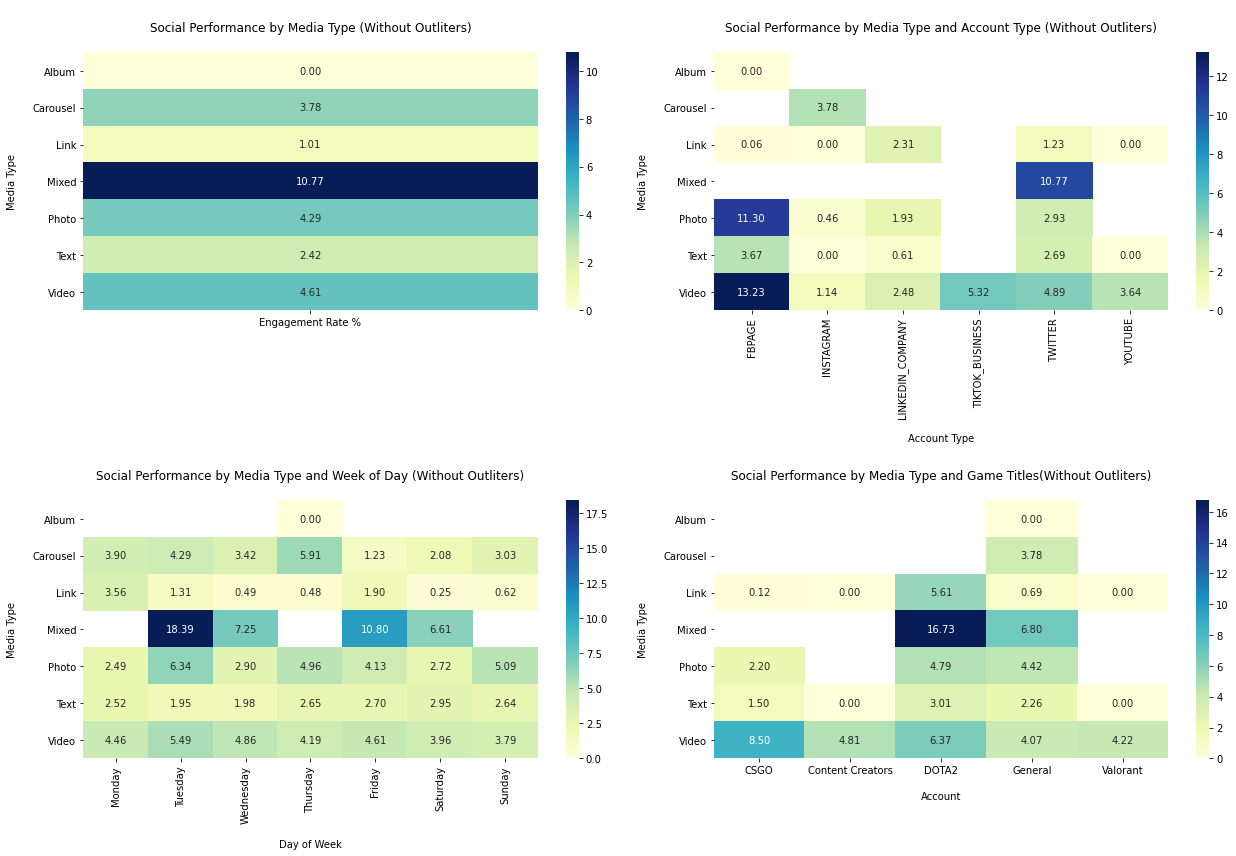

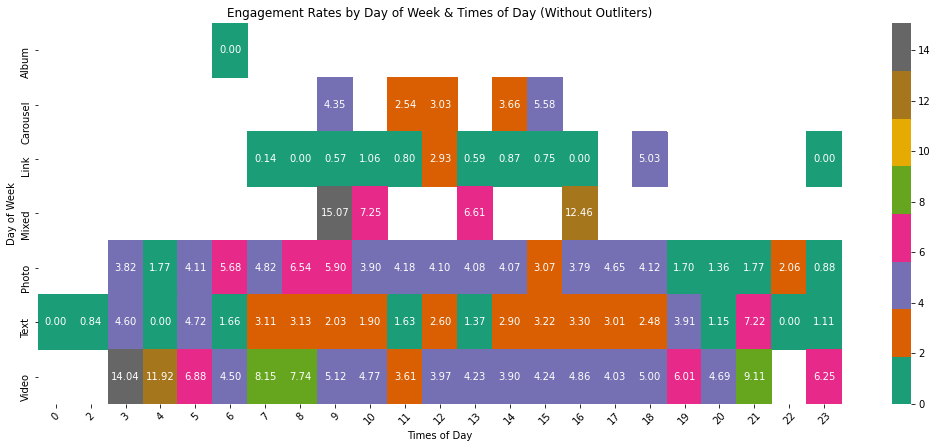

In [30]:
pt_mediatype = filtered_data.pivot_table(index = 'Media Type', values = 'Engagement Rate %')
pt_accounttype = filtered_data.pivot_table(index = 'Media Type', columns = 'Account Type', values = 'Engagement Rate %')
pt_weekofday = filtered_data.pivot_table(index = 'Media Type', columns = 'Day of Week', values = 'Engagement Rate %')
pt_game = filtered_data.pivot_table(index = 'Media Type', columns = 'Account', values = 'Engagement Rate %')
#pt_campaign = filtered_data.pivot_table(index = 'Meida Type', columns = 'Campaign Name', values = 'Engagement Rate %')

# Create the heatmap
fig, ax = plt.subplots(2, 2, figsize = (18, 12))
#plt.figure(figsize = (8, 6))
sns.heatmap(pt_mediatype , cmap='YlGnBu', annot = True, fmt = '.2f', cbar = True, ax = ax[0, 0])
ax[0,0].set_title('\nSocial Performance by Media Type (Without Outliters)\n')
ax[0,0].set_xlabel('\n')
ax[0,0].set_ylabel('Media Type\n')


sns.heatmap(pt_accounttype, cmap='YlGnBu', annot = True, fmt = '.2f', cbar = True,  ax = ax[0, 1])
ax[0,1].set_title('\nSocial Performance by Media Type and Account Type (Without Outliters)\n')
ax[0,1].set_xlabel('\nAccount Type')
ax[0,1].set_ylabel('Media Type\n')

sns.heatmap(pt_weekofday, cmap='YlGnBu', annot = True, fmt = '.2f', cbar = True,  ax = ax[1,0])
ax[1,0].set_title('\nSocial Performance by Media Type and Week of Day (Without Outliters)\n')
ax[1,0].set_xlabel('\nDay of Week')
ax[1,0].set_ylabel('Media Type\n')

sns.heatmap(pt_game, cmap='YlGnBu', annot = True, fmt = '.2f', cbar = True,  ax = ax[1,1])
ax[1,1].set_title('\nSocial Performance by Media Type and Game Titles(Without Outliters)\n')
ax[1,1].set_xlabel('\nAccount')
ax[1,1].set_ylabel('Media Type\n')


plt.tight_layout()
plt.show()

pivot_df = filtered_data.pivot_table(index = 'Media Type', columns='Hour of Day', values='Engagement Rate %')

# Plot the engagement rates using a heatmap
plt.figure(figsize=(18, 7))
sns.heatmap(pivot_df, cmap='Dark2', annot=True, fmt='.2f', cbar=True, label='Engagement Rate')
plt.title('Engagement Rates by Day of Week & Times of Day (Without Outliters)')
plt.xlabel('Times of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.show()


***
* **Based on the results I found, here is my analysis:**
1. The aggregate engagement Rate for Media Type is 11.07%.
2. Compared to other media types, 'Photo' has the highest total impressions, total engagements. Then, the second highest is Video, third is Text
3. I also performed a statistical test, specifically ANOVA this time. To analyze the data and compare the differences among the engagement rates for media types. Based on the dataset, the results indicate a significant difference between the engagement rates across different games.The F-statistic is 23.067 and a very low P-value is 7.832e-27. Therefore, we can infer that the engagement rates vary significantly across the different media types.
4. In the top-left plot, it cleared to show the highest engagament rate is in 'Mixed', despite 'Photo' is the the highest total impressions and total engagements. The second highest engagament rate is 'Video', the third is 'Photo'. Based on this, I would like to recommend that posting media type can more focus on Mixed and Video than Photo
5. In the top-right plot, I observed the engagement rate of different media types across various account types. Based on this analysis, I can summarize the key findings as follows:
    1. 'Video': the highest engagement rate is FBPAGE, then TIKTOK and Twitter
    2. 'Photo': the highest engagement rate is FBPAGE, then Twitter
    3. 'Text': the highest engagement rate is FBPAGE
    4. 'Mixed': the highest engagement rate is Twitter
    5. 'Link': the highest engagement rate is LinkedIn
    6. 'Carousel': the highest engagement rate is Instagram
6. In the bottom-left plot, I observed the engagement rate of different media types across different weekdays. Based on this analysis, I can summarize the key findings as follows:
    1. 'Video': the highest engagement rate is Tuesday
    2. 'Photo': the highest engagement rate is Tuesday
    3. 'Text': the highest engagement rate is Saturday and Friday
    4. 'Mixed': the highest engagement rate is Tuesday and Friday
    5. 'Link': the highest engagement rate is Monday
    6. 'Carousel': the highest engagement rate is Thursday
7. In the bottom-right plot, I observed the engagement rate of different media types across different games. Based on this analysis, I can summarize the key findings as follows:
    1. 'Video': the highest engagement rate is 'CSGO', then 'DOTA2'
    2. 'Photo': the highest engagement rate is 'DOTA2' & 'General'
    3. 'Text': the highest engagement rate is 'DOTA2'
    4. 'Mixed': the highest engagement rate is 'DOTA2'
    5. 'Link': the highest engagement rate is 'DOTA2'
    6. 'Carousel': the highest engagement rate is 'General'
****
**In conclusion, the media type 'Mixed' consistently shows the highest engagement rate across various attributes. However, its performance varies when considering different factors such as 'Account Type', 'Account', weekdays, and times of day. Specifically, compared to other account types, 'Mixed' performs the best. Similarly, when comparing different media types, 'Video' yields the highest engagement rate. Furthermore, in terms of specific weekdays and times of day, 'Mixed' stands out as the top performance.**
****

**5. What is our best performing campaign?**

In [31]:
engagement_account = df.groupby('Campaign Name')['Total Engagements'].sum()
impression_account = df.groupby('Campaign Name')['Total Impressions'].sum()

print('The aggregate engagement Rate for Campaign Name is {:.2f}%.\n'.format((engagement_account/impression_account).mean() * 100))

The aggregate engagement Rate for Campaign Name is 7.25%.



In [32]:
metrics = {
    'Total Impressions': new_dt.groupby('Campaign Name')['Total Impressions'].sum(),
    'Total Engagements': new_dt.groupby('Campaign Name')['Total Engagements'].sum()
}

# Create a summary DataFrame
summary = pd.DataFrame(metrics)

# Sort the summary DataFrame by a specific metric
sorted_summary = summary.sort_values(by = 'Total Impressions', ascending = False)

print(sorted_summary.to_string())

                       Total Impressions  Total Engagements
Campaign Name                                              
Community Engagement            23803756            2044767
N/A                              7297780            1018013
Evil Exhibited                   5742595             185305
Evergreen                        1328729              43127


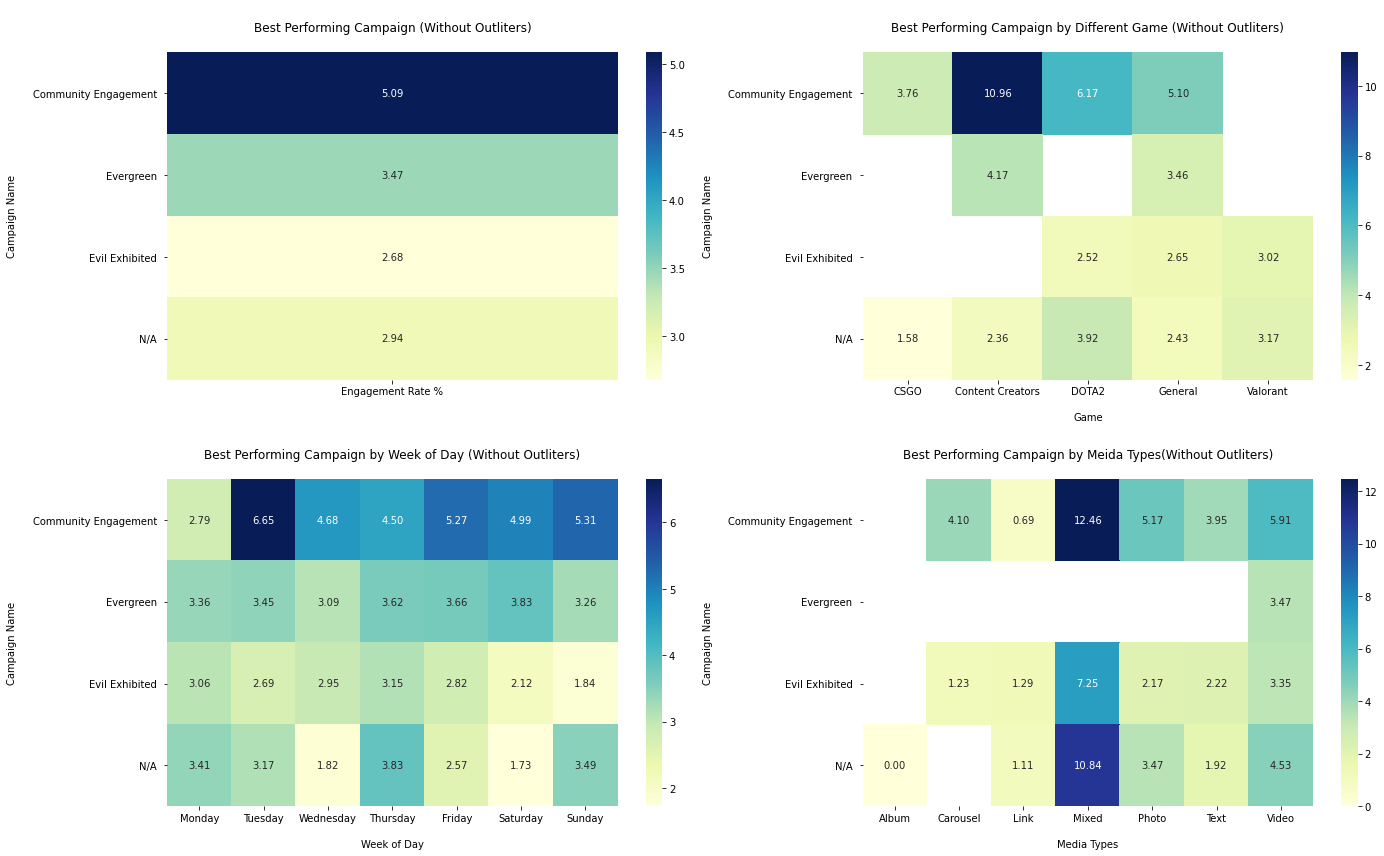

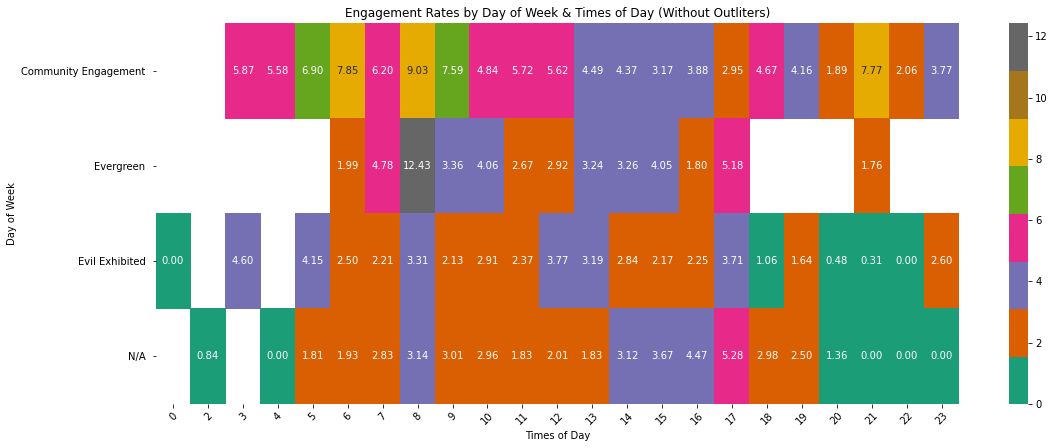

In [33]:
pt_CampaignName = filtered_data.pivot_table(index = 'Campaign Name', values = 'Engagement Rate %')
pt_Gametitles = filtered_data.pivot_table(index = 'Campaign Name', columns = 'Account', values = 'Engagement Rate %')
pt_weekofday = filtered_data.pivot_table(index = 'Campaign Name', columns = 'Day of Week', values = 'Engagement Rate %')
pt_MediaTye = filtered_data.pivot_table(index = 'Campaign Name', columns = 'Media Type', values = 'Engagement Rate %')
#pt_campaign = filtered_data.pivot_table(index = 'Meida Type', columns = 'Campaign Name', values = 'Engagement Rate %')

# Create the heatmap
fig, ax = plt.subplots(2, 2, figsize = (20, 12))
#plt.figure(figsize = (8, 6))
sns.heatmap(pt_CampaignName, cmap='YlGnBu', annot = True, fmt = '.2f', cbar = True, ax = ax[0, 0])
ax[0,0].set_title('\nBest Performing Campaign (Without Outliters)\n')
ax[0,0].set_xlabel('\n')
ax[0,0].set_ylabel('Campaign Name\n')


sns.heatmap(pt_Gametitles, cmap='YlGnBu', annot = True, fmt = '.2f', cbar = True,  ax = ax[0, 1])
ax[0,1].set_title('\nBest Performing Campaign by Different Game (Without Outliters)\n')
ax[0,1].set_xlabel('\nGame')
ax[0,1].set_ylabel('Campaign Name\n')

sns.heatmap(pt_weekofday, cmap='YlGnBu', annot = True, fmt = '.2f', cbar = True,  ax = ax[1,0])
ax[1,0].set_title('\nBest Performing Campaign by Week of Day (Without Outliters)\n')
ax[1,0].set_xlabel('\nWeek of Day')
ax[1,0].set_ylabel('Campaign Name\n')

sns.heatmap(pt_MediaTye, cmap='YlGnBu', annot = True, fmt = '.2f', cbar = True,  ax = ax[1,1])
ax[1,1].set_title('\nBest Performing Campaign by Meida Types(Without Outliters)\n')
ax[1,1].set_xlabel('\nMedia Types')
ax[1,1].set_ylabel('Campaign Name\n')


plt.tight_layout()
plt.show()

# Plot the engagement rates using a heatmap

pivot_df = filtered_data.pivot_table(index = 'Campaign Name', columns='Hour of Day', values='Engagement Rate %')

plt.figure(figsize=(18, 7))
sns.heatmap(pivot_df, cmap='Dark2', annot=True, fmt='.2f', cbar=True, label='Engagement Rate')
plt.title('Engagement Rates by Day of Week & Times of Day (Without Outliters)')
plt.xlabel('Times of Day')
plt.ylabel('Day of Week')
plt.xticks(rotation=45)
plt.show()

pt_accType = filtered_data.pivot_table(index = 'Account Type', columns = 'Account', values='Engagement Rate %')

***
* **Based on the results I found, here is my analysis:(In this time, I assume N/A is type of missing values)**
1. The aggregate engagement Rate for Campaign Name is 7.25%.
2. Compared to other Campaign Name , 'Community Engagement' has the highest total impressions, total engagements.
3. In the top-left plot, it is evident that 'Community Engagement' achieves the highest engagement rate among the different campaign names. Surprisingly, 'Evergreen' follows closely as the second highest engagement rate, despite having the lowest total impressions and total engagements among all the campaign names.
4. In the top-right plot, I observed the engagement rate of different campaign name across diferent game. Based on this analysis, I can summarize the key findings as follows:
    1. 'Community Engagement': the highest engagement rate is 'Content Creators'
    2. 'Evergreen': the highest engagement rate is 'Content Creators'
    3. 'Evil Exhibited': the highest engagement rate is 'Valorant
    4. 'N/A': the highest engagement rate is 'DOTA2'
5. In the bottom-left plot, it can be observed that regardless of the weekday, the highest engagement rate consistently appears on the 'Community Engagement' compaign name.
6. In the bottom-right plot, similar result as the bottom-left plot. Regardless of the Media type, the highest engagement rate consistently appears on the 'Community Engagement' compaign name.
****
**In conclusion, the best performing campaign is 'Community Engagement'**
****

**6. Define out a posting strategy for our social channels based on your discoveries.**

***
**Based on the discoveries above, I have some suggestions for the posting strategy:**
1. When aiming to increase the engagement rate for different game titles, it is advisable to establish specific posting times and weekdays, as well as leverage different media types and account types. This approach facilitates the optimization of engagement rates and enhances overall social performance.

    1. **'CSGO'** focuses on Thursday and Saturday;<br>
        Posting Time period maily at 8AM, then 3AM, 6AM-7AM, 21PM;<br>
        Media type: Video
          
    2. **'Content Creators'** mainly focuses on Saturday, then Wednesday and Friday;<br>
        Posting Time period maily at 12PM, then 10AM, 14PM-15PM<br>
        Meida Type: Video
        
    3. **'DOTA2'** focuses on Monday, Tuesday and Thursday;<br>
        Posting Time period maily at 19PM, then 4AM-6AM, 18PM<br>
        Media Type: Mixed; Then Video and Link
        
    4. **'General'** mainly focuses on Tuesday and Sunday;<br>
        Posting Time period maily at 3AM-4AM, then 5AM,7AM-8AM, 21PM<br>
        Meida Type: Mixes, then Photo and Video
        
    5. **'Valorant'** maily focuses on Monday and Saturday;<br>
        Posting Time period maily at 12PM, 15PM, then 9AM<br>
        Meida Type: Video
        
        
2. When promoting different campaign names, it is recommended to utilize specific account types and media types, as well as vary the posting times and weekdays. This strategy can effectively boost engagement rates and improve social performance.
    1. **'Community Engagement'**: focus on the posting with game 'Content Creators'<br>
         Posting maily on Tuesday, then Friday to Sunday, time periods around 8AM, then 6AM, and 20PM<br>
         Media type can choose Mixed, Video and Photo
    
    2. **'Evergreen'**: focus on the posting with game 'Content Creators'<br>
        Posting mainly on Friday and Saturday, time period maily at 8AM, then 17PM<br>
        Media type can choose Video

    3. **'Evil Exhibited'**: focus on the posting with game 'Valorant'<br>
        Posting mainly on Monday and Thursday, time period maily at 3AM - 5AM<br>
        Media type can choose Mixed, Video
     
    4. **'N/A'**: focus on the posting with game 'DOTA2'<br>
        Posting mainly on THursday, Sunday and Monday, time period around 14PM - 17PM<br>
        Media type can choose Mixed, Video and Photo

3. Based on the popularity list of media types in 2022 from the Pew Research Center (https://www.pewresearch.org/internet/2022/08/10/teens-social-media-and-technology-2022/pj_2022-08-10_teens-and-tech_0-01a/), YouTube is the most popular platform, followed by TikTok and Instagram. Considering the engagement rates for different games with various media types in this dataset, I recommend the following posting strategies:
    1. For games like 'CSGO', 'Content Creators', 'DOTA2', and 'Valorant', consider posting content through TikTok and YouTube using video format. These platforms have high popularity and can potentially attract a larger audience for these game titles.
    2. For the 'General' game category, utilize Instagram as it is among the popular platforms. You can post a mix of photo and video content on Instagram to engage with the audience effectively.
    3. For 'CSGO' and 'DOTA2', consider posting through 'FBPAGE' and 'INSTAGRAM' using the link format. This allows you to share links related to the games and drive traffic to specific websites or resources.



**7. What suggestions would you give to the social media team if they want to expand their presence (e.g. if our CSGO youtube channel is doing well should we expand to TikTok)?**

* **To determine the best time with the highest engagement rate $\%$, I am going to use heatmap by examining the engagement rate percentage across different time periods.**

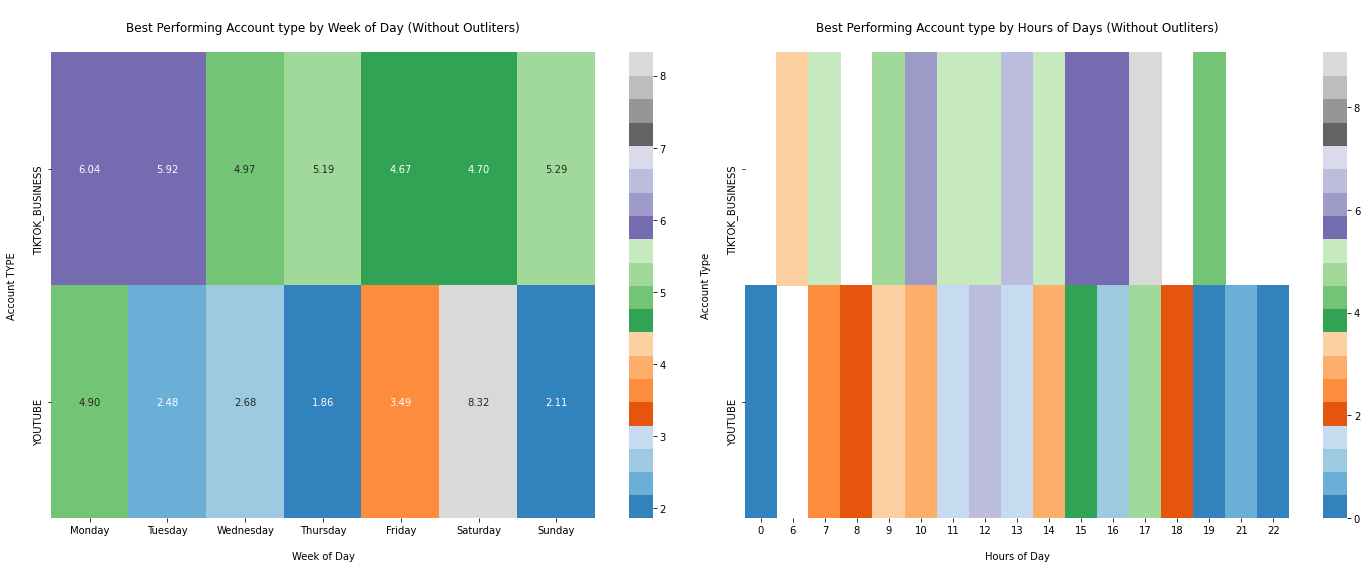

In [34]:
q7_filtered_data = df[df['Account Type'].isin(['YOUTUBE', 'TIKTOK_BUSINESS'])]
pt_weekofday = q7_filtered_data.pivot_table(index = 'Account Type', columns = 'Day of Week', values = 'Engagement Rate %')
pt_MediaTye = q7_filtered_data.pivot_table(index = 'Account Type', columns = 'Hour of Day', values = 'Engagement Rate %')
#pt_campaign = filtered_data.pivot_table(index = 'Meida Type', columns = 'Campaign Name', values = 'Engagement Rate %')

# Create the heatmap
fig, ax = plt.subplots(1, 2, figsize = (20, 8))
#plt.figure(figsize = (8, 6))

sns.heatmap(pt_weekofday, cmap = 'tab20c', annot = True, fmt = '.2f', cbar = True,  ax = ax[0])
ax[0].set_title('\nBest Performing Account type by Week of Day (Without Outliters)\n')
ax[0].set_xlabel('\nWeek of Day')
ax[0].set_ylabel('Account TYPE\n')

sns.heatmap(pt_MediaTye, cmap = 'tab20c', annot = False, fmt = '.2f', cbar = True,  ax = ax[1])
ax[1].set_title('\nBest Performing Account type by Hours of Days (Without Outliters)\n')
ax[1].set_xlabel('\nHours of Day')
ax[1].set_ylabel('Account Type\n')


plt.tight_layout()
plt.show()

* **Since in this dataset, there is only one 'Account' named 'General' is posting with Tiktok and Youtube at the same time. Thus, I am going to filter the General and CSGO out as the comparison**

In [35]:
q7_data = df[df['Account'].isin(['CSGO', 'General'])]

engagement_account_0 = q7_data.groupby('Campaign Name')['Total Engagements'].sum()
impression_account_0 = q7_data.groupby('Campaign Name')['Total Impressions'].sum()

print('The aggregate engagement Rate for game titles is {:.2f}%.\n'.format((engagement_account_0/impression_account_0).mean() * 100))

The aggregate engagement Rate for game titles is 7.56%.



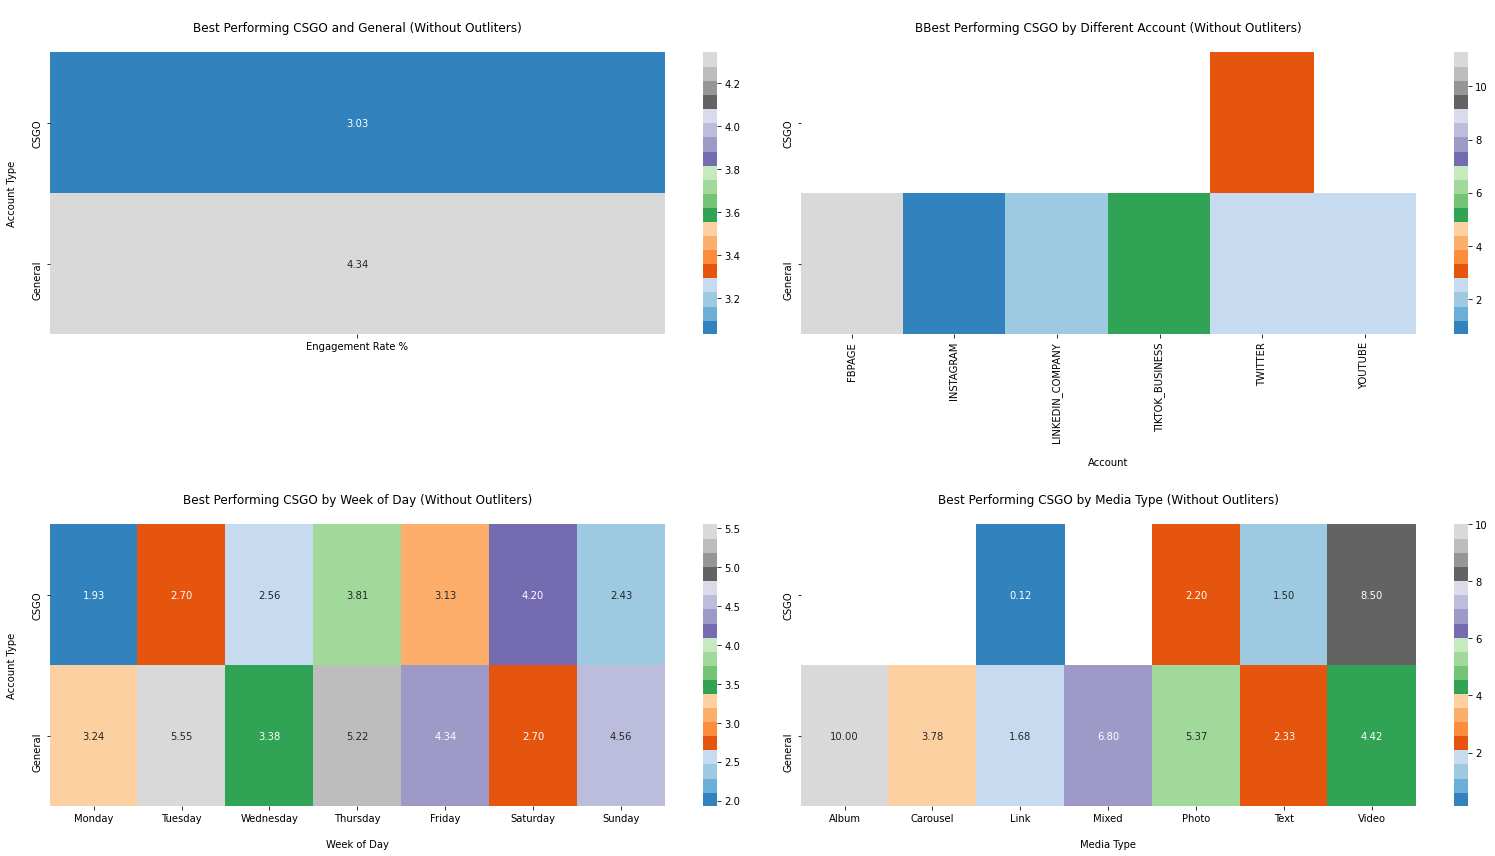

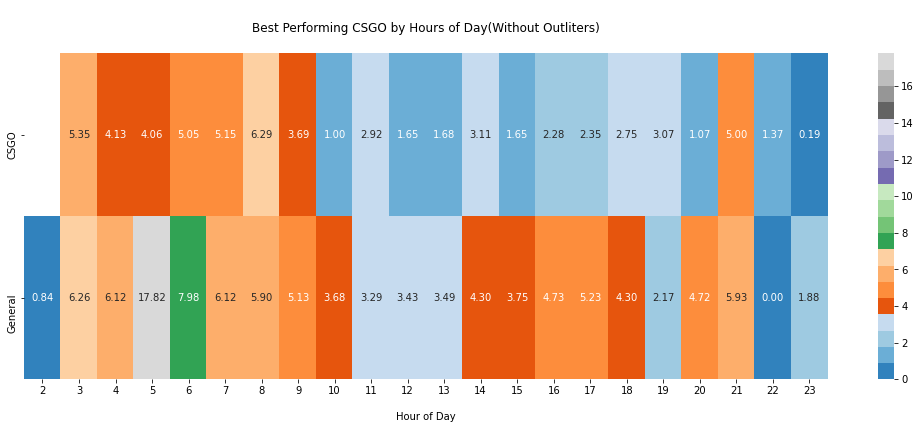

In [36]:
pt_Game_Media = q7_data.pivot_table(index = 'Account', columns = 'Media Type', values = 'Engagement Rate %')
pt_Game_Account = q7_data.pivot_table(index = 'Account', columns = 'Account Type', values = 'Engagement Rate %')
pt_weekofday = q7_data.pivot_table(index = 'Account', columns = 'Day of Week', values = 'Engagement Rate %')
pt_engagement = q7_data.pivot_table(index = 'Account', values = 'Engagement Rate %')
#pt_campaign = filtered_data.pivot_table(index = 'Meida Type', columns = 'Campaign Name', values = 'Engagement Rate %')

# Create the heatmap
fig, ax = plt.subplots(2, 2, figsize = (22, 12))
#plt.figure(figsize = (8, 6))
sns.heatmap(pt_engagement, cmap = 'tab20c', annot = True, fmt = '.2f', cbar = True, ax = ax[0, 0])
ax[0,0].set_title('\nBest Performing CSGO and General (Without Outliters)\n')
ax[0,0].set_xlabel('\n')
ax[0,0].set_ylabel('Account Type\n')


sns.heatmap(pt_Game_Account, cmap = 'tab20c', annot = False, fmt = '.2f', cbar = True,  ax = ax[0, 1])
ax[0,1].set_title('\nBBest Performing CSGO by Different Account (Without Outliters)\n')
ax[0,1].set_xlabel('\nAccount')
ax[0,1].set_ylabel('\n')

sns.heatmap(pt_weekofday, cmap = 'tab20c', annot = True, fmt = '.2f', cbar = True,  ax = ax[1,0])
ax[1,0].set_title('\nBest Performing CSGO by Week of Day (Without Outliters)\n')
ax[1,0].set_xlabel('\nWeek of Day')
ax[1,0].set_ylabel('Account Type\n')

sns.heatmap(pt_Game_Media, cmap = 'tab20c', annot = True, fmt = '.2f', cbar = True,  ax = ax[1,1])
ax[1,1].set_title('\nBest Performing CSGO by Media Type (Without Outliters)\n')
ax[1,1].set_xlabel('\nMedia Type')
ax[1,1].set_ylabel('\n')

plt.tight_layout()
plt.show()
plt.figure(figsize = (18, 6))
pt_MediaTye = q7_data.pivot_table(index = 'Account', columns = 'Hour of Day', values = 'Engagement Rate %')
sns.heatmap(pt_MediaTye, cmap = 'tab20c', annot = True, fmt = '.2f', cbar = True )
plt.title('\nBest Performing CSGO by Hours of Day(Without Outliters)\n')
plt.xlabel('\nHour of Day')
plt.ylabel('\n')

plt.show()


**Assuming that the CSGO YouTube channel is performing well, I recommend expanding to TikTok. Here are my reasons and suggestions on how to achieve this:**

1. Comparison of 'General' and 'CSGO': When comparing the engagement rates of 'General' and 'CSGO', it is evident that 'General' has a higher engagement rate(CSGO: 3.03 < General: 4.34). Specifically, on 'General', 'TikTok' ranks the second in terms of engagement rate. This indicates that TikTok plays a crucial role in driving engagement. Thus, we should be explored by the CSGO channel.

2. Impact of media type on 'CSGO': Among the different media types, 'Video' has the most significant impact on increasing the engagement rate. TikTok, being a platform focused on short videos, aligns well with the content format of 'CSGO'.
****
**To execute the expansion to TikTok effectively, consider the following steps:**

1. Maintain a consistent posting schedule: Consistency is key on TikTok. Develop a posting schedule that ensures regular and frequent content updates. This helps to keep the audience engaged and encourages them to follow and interact with the CSGO TikTok account. Based on my analysis, here is the suggestion I made:
    * Since the information belows:
        1. CSGO's popularity weekdays queue list: Saturday > Thursday > Friday > Tuesday > Wednesday > Sunday > Monday 
        2. TIKTOK's popularity weekdays queue list: Monday > Tuesday > Sunday > Thursday > Wednesday > Saturday >Friday 
        
        3. CSGO's most popularity hours of days are 8AM(top),7AM, 3AM
        4. TIKTOK's most popularuty hours of days are 7AM, 11-13AM, 14PM
    * Hence, I would like to conclude that 'CSGO's posting schedule can set in 3 different time in a week: Tuesday, Thursday and Wednesday; For the specific time, we can posting around 7AM-8AM, 11-13AM<br>
2. Utilize relevant hashtags and trends: Based on the analysis conducted in question 5, the campaign named 'Community Engagement' achieved the highest engagement rate among the different campaign names. Therefore, it is recommended to include the hashtag 'Community Engagement' in our TikTok videos. Additionally, further research is needed to identify popular hashtags within the gaming and 'CSGO' communities, which can be incorporated into our content strategy.

3. In addition, we need to gather demographic data for developing a tailored content strategy for TikTok: To better understand the preferences and interests of the CSGO target audience on TikTok, it is essential to gather more demographic data. This data will help us develop a content strategy specifically tailored for TikTok. In addition, incorporating cost data into the analysis will allow us to identify the types of videos that resonate with the CSGO target audience and provide insights on the best investment of resources.

4. Under research by myself, here are some main types of videos on TikTok that can be explored:
    1. Collaborating with influencers to create engaging content related to CSGO.
    2. Creating game tutorial videos
    3. Challenges that attract the attention of the CSGO community.
    3. Showcasing game highlights based on trending sounds, which can capture the interest of TikTok users.
****

**To gather demographic data for developing a tailored content strategy for TikTok focusing on CSGO (Counter-Strike: Global Offensive), you can follow these steps:**

***

   1. **Define your target audience**: Determine the specific demographic group you want to target with your content strategy. Consider factors such as age, gender, location, interests, and gaming preferences. In the case of CSGO, you may want to target gamers, esports enthusiasts, or fans of competitive FPS games.

   2. **Conduct market research**: Utilize market research tools, surveys, and analytics to gather data on TikTok users who are interested in CSGO. Platforms like TikTok provide insights and analytics that can help you understand the demographics of your existing audience.

   3. **Analyze user behavior**: Study the behavior of CSGO-related content consumers on TikTok. Look for patterns in video engagement, views, likes, and shares. Identify the types of content that resonate with your target audience and gain traction.

   4. **Leverage social listening**: Monitor conversations and discussions related to CSGO and TikTok on social media platforms. This can help you understand the preferences, interests, and challenges of your target audience.

   5. **Collaborate with influencers**: Identify popular influencers or content creators who specialize in CSGO or gaming content on TikTok. Analyze their follower demographics to gain insights into your target audience and leverage their expertise to shape your content strategy.

   6. **Test and iterate**: Develop and share different types of content on TikTok, such as gameplay highlights, tutorials, tips, or behind-the-scenes glimpses. Monitor the performance of each content type, analyze audience engagement, and refine your strategy based on the data and feedback received.

   7. **Track and measure results**: Continuously monitor the performance of your TikTok content strategy by tracking metrics like views, likes, shares, comments, and follower growth. Use this data to measure the success of your tailored approach and make data-driven adjustments as needed.

***
**Remember, demographic data is just one aspect of developing a tailored content strategy. It's essential to also consider the unique characteristics and preferences of your target audience to create engaging and relevant content that resonates with them.**